# Create Software Project - Take Home Midterm Exam/Assignment

* Objective: this jupyter notebook is intended to evaluate how the students understand the Duckietown repo

Prof. Nick Wang, 2016/11/7

## Instructions: 
1. $ cp assignment1.ipynb assignment1-XXXXXXX.ipynb (XXXXXXX is your name) You also need to add your name, setup, and state the contributions in the setup and contributions section.
2. You can already see the desired outputs of each cell, and you need to find the relevant code in the Duckietown repo and reproduce the results.
3. Each student needs to submit one to your mentor, via email. Please do not commit your ipynb to repo. Please do not modify assignment1.ipynb.


## Steup and Conributions:

This work is done by: 0210904 邱冠彰

Contribution : Discussion and compare the image before and after adjusting

Working enviroment : VirtualBox 5.0.16 version on Windows 8.1

Helping : Thanks 廖品崴 for helping me solve rectifiying image and resizing image 

# Line Detector

### 1.Load the image and resize

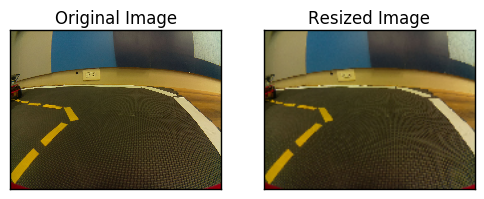

After Adjust


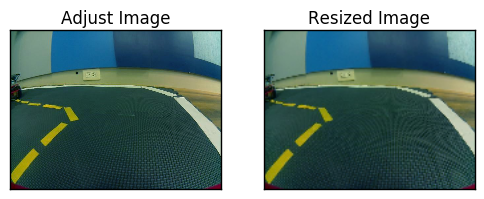

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#Use your own image
img = cv2.imread("images/lane.jpg")

image_cv = cv2.resize(img, (160, 120),interpolation=cv2.INTER_NEAREST)

#Add an adjust image to compare with the origin one 
imgAdjust = cv2.imread("images/lane_after_adjust.jpg")

imageAdjust_cv = cv2.resize(img, (160, 120),interpolation=cv2.INTER_NEAREST)

dst1 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.subplot(121),plt.imshow(dst1,cmap = 'brg')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

dst2 = cv2.cvtColor(image_cv,cv2.COLOR_BGR2RGB)
plt.subplot(122),plt.imshow(dst2,cmap = 'brg')
plt.title('Resized Image'), plt.xticks([]), plt.yticks([])


plt.show()

#The adjusting image is done by computer,since the origin image has a little problem on discovering yellow line
print "After Adjust"
imgAdjust = cv2.imread("images/lane_after_adjust.jpg")

imageAdjust_cv = cv2.resize(imgAdjust, (160, 120),interpolation=cv2.INTER_NEAREST)

dst3 = cv2.cvtColor(imgAdjust,cv2.COLOR_BGR2RGB)
plt.subplot(121),plt.imshow(dst3,cmap = 'brg')
plt.title('Adjust Image'), plt.xticks([]), plt.yticks([])

dst4 = cv2.cvtColor(imageAdjust_cv,cv2.COLOR_BGR2RGB)
plt.subplot(122),plt.imshow(dst4,cmap = 'brg')
plt.title('Resized Image'), plt.xticks([]), plt.yticks([])

plt.show()


### 2.Find the edge (15%)

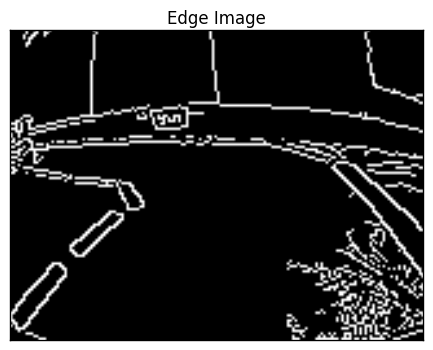

In [3]:

'''
#You should find the config file 'universal.yaml'
#You code this
gray = ???
edges = ???
'''
edges = cv2.Canny(image_cv, 60 ,150)
plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

### 3-1.Setup HSV space threshold (15%)

In [4]:
'''
#You should find the config file 'universal.yaml'
hsv_white1 = ???
hsv_white2 = ???
hsv_yellow1 = ???
hsv_yellow2 = ???
hsv_red1 = ???
hsv_red2 = ???
hsv_red3 = ???
hsv_red4 = ???
'''

hsv_white1 = np.array([0,0,150])
hsv_white2 = np.array([180,100,255])
hsv_yellow1 = np.array([25,50,50])
hsv_yellow2 = np.array([45,255,255])
hsv_red1 = np.array([0,100,100])
hsv_red2 = np.array([15,255,255])
hsv_red3 = np.array([165,100,100])
hsv_red4 = np.array([180,255,255])

### 3-2.Threshold colors in HSV space (15%)

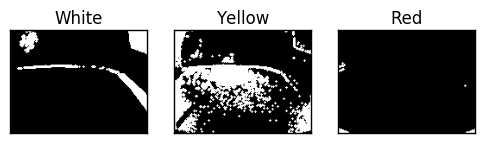

After Adjust


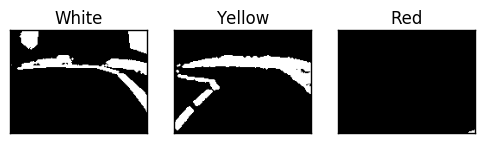

In [5]:
'''
#change color space to HSV
hsv = ???

find the color
white = ???
kernel = ???
white = ???

yellow = ???
kernel = ???
yellow = ???

red1 = ???
red2 = ???
red = ???
kernel = ???
red = ???
'''
dilation_kernel_size = 3
hsv = cv2.cvtColor(image_cv,cv2.COLOR_BGR2HSV)
white = cv2.inRange(hsv,hsv_white1,hsv_white2)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(dilation_kernel_size, dilation_kernel_size))
white = cv2.dilate(white,kernel)  
yellow = cv2.inRange(hsv,hsv_yellow1,hsv_yellow2)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(dilation_kernel_size, dilation_kernel_size))
yellow = cv2.dilate(yellow,kernel)
red1 = cv2.inRange(hsv,hsv_red1,hsv_red2)
red2 = cv2.inRange(hsv,hsv_red3,hsv_red4)
red = cv2.bitwise_or(red1,red2)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(dilation_kernel_size, dilation_kernel_size))
red = cv2.dilate(red,kernel)
#color for Adjust image
hsvA = cv2.cvtColor(imageAdjust_cv,cv2.COLOR_BGR2HSV)
whiteA = cv2.inRange(hsvA,hsv_white1,hsv_white2)
kernelA = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(dilation_kernel_size, dilation_kernel_size))
whiteA = cv2.dilate(whiteA,kernelA)  
yellowA = cv2.inRange(hsvA,hsv_yellow1,hsv_yellow2)
kernelA = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(dilation_kernel_size, dilation_kernel_size))
yellowA = cv2.dilate(yellowA,kernelA)
red1A = cv2.inRange(hsvA,hsv_red1,hsv_red2)
red2A = cv2.inRange(hsvA,hsv_red3,hsv_red4)
redA = cv2.bitwise_or(red1A,red2A)
kernelA = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(dilation_kernel_size, dilation_kernel_size))
redA = cv2.dilate(redA,kernelA)
# Uncomment '#' to plot with color
x = cv2.cvtColor(yellow, cv2.COLOR_GRAY2BGR)
x[:,:,2] *= 1
x[:,:,1] *= 1
x[:,:,0] *= 0
x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)

y = cv2.cvtColor(red, cv2.COLOR_GRAY2BGR)
y[:,:,2] *= 1
y[:,:,1] *= 0
y[:,:,0] *= 0
y = cv2.cvtColor(y, cv2.COLOR_BGR2RGB)

xA = cv2.cvtColor(yellowA, cv2.COLOR_GRAY2BGR)
xA[:,:,2] *= 1
xA[:,:,1] *= 1
xA[:,:,0] *= 0
xA = cv2.cvtColor(xA, cv2.COLOR_BGR2RGB)

yA = cv2.cvtColor(redA, cv2.COLOR_GRAY2BGR)
yA[:,:,2] *= 1
yA[:,:,1] *= 0
yA[:,:,0] *= 0
yA = cv2.cvtColor(yA, cv2.COLOR_BGR2RGB)

plt.subplot(131),plt.imshow(white,cmap = 'gray')
plt.title('White'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(yellow,cmap = 'gray')
#plt.subplot(132),plt.imshow(x,cmap = 'brg')
plt.title('Yellow'), plt.xticks([]), plt.yticks([])

plt.subplot(133),plt.imshow(red,cmap = 'gray')
#plt.subplot(133),plt.imshow(y,cmap = 'brg')
plt.title('Red'), plt.xticks([]), plt.yticks([])

plt.show()

print "After Adjust"

plt.subplot(131),plt.imshow(whiteA,cmap = 'gray')
plt.title('White'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(yellowA,cmap = 'gray')
#plt.subplot(132),plt.imshow(x,cmap = 'brg')
plt.title('Yellow'), plt.xticks([]), plt.yticks([])

plt.subplot(133),plt.imshow(redA,cmap = 'gray')
#plt.subplot(133),plt.imshow(y,cmap = 'brg')
plt.title('Red'), plt.xticks([]), plt.yticks([])

plt.show()

### 4.Combine Edge and Colors (15%)

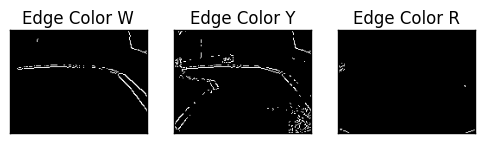

After Adjust


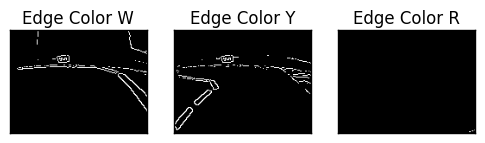

In [6]:
'''
edge_color_white = ???
edge_color_yellow = ???
edge_color_red = ???
'''

edge_color_white = cv2.bitwise_and(white, edges)
edge_color_yellow = cv2.bitwise_and(yellow, edges)
edge_color_red = cv2.bitwise_and(red, edges)
plt.imshow(edge_color_yellow,cmap = 'gray')
plt.title('Edge Color Y'), plt.xticks([]), plt.yticks([])
plt.subplot(131),plt.imshow(edge_color_white,cmap = 'gray')
plt.title('Edge Color W'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(edge_color_yellow,cmap = 'gray')
plt.title('Edge Color Y'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(edge_color_red,cmap = 'gray')
plt.title('Edge Color R'), plt.xticks([]), plt.yticks([])

plt.show()

print "After Adjust"

edge_color_whiteA = cv2.bitwise_and(whiteA, edges)
edge_color_yellowA = cv2.bitwise_and(yellowA, edges)
edge_color_redA = cv2.bitwise_and(redA, edges)
plt.imshow(edge_color_yellowA,cmap = 'gray')
plt.title('Edge Color Y'), plt.xticks([]), plt.yticks([])
plt.subplot(131),plt.imshow(edge_color_whiteA,cmap = 'gray')
plt.title('Edge Color W'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(edge_color_yellowA,cmap = 'gray')
plt.title('Edge Color Y'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(edge_color_redA,cmap = 'gray')
plt.title('Edge Color R'), plt.xticks([]), plt.yticks([])

plt.show()

### 5-1.Find the lines (15%)

In [7]:
'''
#default threshold 20-> 10
lines_white = ???
lines_yellow = ???
lines_red = ???
'''
hough_threshold=20
hough_min_line_length=3
hough_max_line_gap=1

lines_yellow = cv2.HoughLinesP(edge_color_yellow ,1,np.pi/180,hough_threshold,np.empty(1),hough_min_line_length,hough_max_line_gap)

color = "yellow"
lines = lines_yellow
bw = yellow

if lines is not None:
    lines = np.array(lines[0])
    print "found lines"

else:
    lines = []
    print "no lines"
    
lines_yellowA = cv2.HoughLinesP(edge_color_yellowA ,1,np.pi/180,hough_threshold,np.empty(1),hough_min_line_length,hough_max_line_gap)

colorA = "yellow A"
linesA = lines_yellowA
bwA = yellowA

if linesA is not None:
    linesA = np.array(linesA[0])
    print "found lines"

else:
    linesA = []
    print "no lines"


found lines
found lines


### Show the lines (yellow)

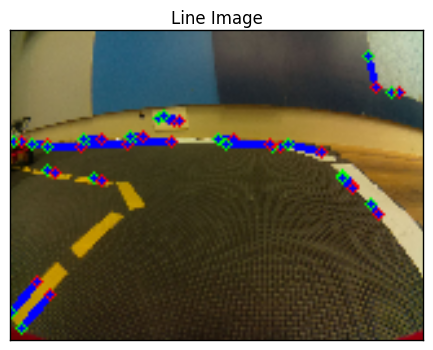

After Adjust


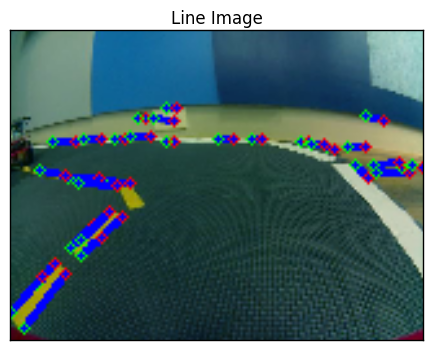

In [8]:
image_with_lines = np.copy(dst2)
if len(lines)>0:
    for x1,y1,x2,y2 in lines:
        cv2.line(image_with_lines, (x1,y1), (x2,y2), (0,0,255), 2)
        cv2.circle(image_with_lines, (x1,y1), 2, (0,255,0))
        cv2.circle(image_with_lines, (x2,y2), 2, (255,0,0))
        
plt.imshow(image_with_lines,cmap = 'brg')
plt.title('Line Image'), plt.xticks([]), plt.yticks([])
plt.show()

print "After Adjust"

image_with_lines2 = np.copy(dst4)

if len(linesA)>0:
    for x1,y1,x2,y2 in linesA:
        cv2.line(image_with_lines2, (x1,y1), (x2,y2), (0,0,255), 2)
        cv2.circle(image_with_lines2, (x1,y1), 2, (0,255,0))
        cv2.circle(image_with_lines2, (x2,y2), 2, (255,0,0))
        
plt.imshow(image_with_lines2,cmap = 'brg')
plt.title('Line Image'), plt.xticks([]), plt.yticks([])
plt.show()

### 6-1.Normals (15%)

In [11]:
arr_cutoff = np.array((0, 40, 0, 40))
arr_ratio = np.array((1./160, 1./120, 1./160, 1./120))
        
normals = []
centers = []
if len(lines)>0:
    
    #find the normalized coordinates
    lines_normalized = ((lines + arr_cutoff) * arr_ratio)

    length = np.sum((lines[:, 0:2] -lines[:, 2:4])**2, axis=1, keepdims=True)**0.5
    dx = 1.* (lines[:,3:4]-lines[:,1:2])/length
    dy = 1.* (lines[:,0:1]-lines[:,2:3])/length
    centers = np.hstack([(lines[:,0:1]+lines[:,2:3])/2, (lines[:,1:2]+lines[:,3:4])/2])
    #find the vectors' direction
    x3 = (centers[:,0:1] - 3.*dx).astype('int')
    x3[x3<0]=0
    x3[x3>=160]=160-1

    y3 = (centers[:,1:2] - 3.*dy).astype('int')
    y3[y3<0]=0
    y3[y3>=120]=120-1

    x4 = (centers[:,0:1] + 3.*dx).astype('int')
    x4[x4<0]=0
    x4[x4>=160]=160-1

    y4 = (centers[:,1:2] + 3.*dy).astype('int')
    y4[y4<0]=0
    y4[y4>=120]=120-1
    

    flag_signs = (np.logical_and(bw[y3,x3]>0, bw[y4,x4]==0)).astype('int')*2-1
    normals = np.hstack([dx, dy]) * flag_signs
    
    flag = ((lines[:,2]-lines[:,0])*normals[:,1] - (lines[:,3]-lines[:,1])*normals[:,0])>0
    for i in range(len(lines)):
        if flag[i]:
            x1,y1,x2,y2 = lines[i, :]
            lines[i, :] = [x2,y2,x1,y1]
            
    
normalsA = []
centersA = []

if len(linesA)>0:
    
    #find the normalized coordinates
    lines_normalizedA = ((linesA + arr_cutoff) * arr_ratio)

    lengthA = np.sum((linesA[:, 0:2] -linesA[:, 2:4])**2, axis=1, keepdims=True)**0.5
    dxA = 1.* (linesA[:,3:4]-linesA[:,1:2])/lengthA
    dyA = 1.* (linesA[:,0:1]-linesA[:,2:3])/lengthA
    centersA = np.hstack([(linesA[:,0:1]+linesA[:,2:3])/2, (linesA[:,1:2]+linesA[:,3:4])/2])
    #find the vectors' direction
    x3A = (centersA[:,0:1] - 3.*dxA).astype('int')
    x3A[x3A<0]=0
    x3A[x3A>=160]=160-1

    y3A = (centersA[:,1:2] - 3.*dyA).astype('int')
    y3A[y3A<0]=0
    y3A[y3A>=120]=120-1

    x4A = (centersA[:,0:1] + 3.*dxA).astype('int')
    x4A[x4A<0]=0
    x4A[x4A>=160]=160-1

    y4A = (centersA[:,1:2] + 3.*dyA).astype('int')
    y4A[y4A<0]=0
    y4A[y4A>=120]=120-1
    

    flag_signsA = (np.logical_and(bwA[y3A,x3A]>0, bwA[y4A,x4A]==0)).astype('int')*2-1
    normalsA = np.hstack([dxA, dyA]) * flag_signsA
    
    flagA = ((linesA[:,2]-linesA[:,0])*normalsA[:,1] - (linesA[:,3]-linesA[:,1])*normalsA[:,0])>0
    for i in range(len(lines)):
        if flag[i]:
            x1,y1,x2,y2 = lines[i, :]
            lines[i, :] = [x2,y2,x1,y1]

### 6-2.Draw the Normals 

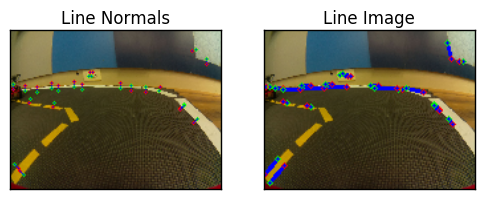

After Adjust


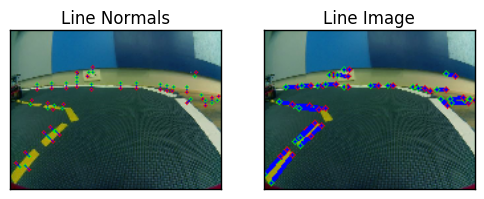

In [13]:
image_with_lines = np.copy(dst2)
if len(centers)>0:
    for x,y,dx,dy in np.hstack((centers,normals)):
        x3 = int(x - 2.*dx)
        y3 = int(y - 2.*dy)
        x4 = int(x + 2.*dx)
        y4 = int(y + 2.*dy)
        cv2.line(image_with_lines, (x3,y3), (x4,y4), (0,0,255), 1)
        cv2.circle(image_with_lines, (x3,y3), 1, (0,255,0))
        cv2.circle(image_with_lines, (x4,y4), 1, (255,0,0))
            
plt.subplot(121),plt.imshow(image_with_lines,cmap = 'brg')
plt.title('Line Normals'), plt.xticks([]), plt.yticks([])

image_with_lines = np.copy(dst2)
if len(lines)>0:
    for x1,y1,x2,y2 in lines:
        cv2.line(image_with_lines, (x1,y1), (x2,y2), (0,0,255), 2)
        cv2.circle(image_with_lines, (x1,y1), 2, (0,255,0))
        cv2.circle(image_with_lines, (x2,y2), 2, (255,0,0))
        
plt.subplot(122),plt.imshow(image_with_lines,cmap = 'brg')
plt.title('Line Image'), plt.xticks([]), plt.yticks([])
plt.show()

print "After Adjust"

image_with_lines = np.copy(dst4)
if len(centersA)>0:
    for x,y,dx,dy in np.hstack((centersA,normalsA)):
        x3 = int(x - 2.*dx)
        y3 = int(y - 2.*dy)
        x4 = int(x + 2.*dx)
        y4 = int(y + 2.*dy)
        cv2.line(image_with_lines, (x3,y3), (x4,y4), (0,0,255), 1)
        cv2.circle(image_with_lines, (x3,y3), 1, (0,255,0))
        cv2.circle(image_with_lines, (x4,y4), 1, (255,0,0))
            
plt.subplot(121),plt.imshow(image_with_lines,cmap = 'brg')
plt.title('Line Normals'), plt.xticks([]), plt.yticks([])

image_with_lines = np.copy(dst4)
if len(linesA)>0:
    for x1,y1,x2,y2 in linesA:
        cv2.line(image_with_lines, (x1,y1), (x2,y2), (0,0,255), 2)
        cv2.circle(image_with_lines, (x1,y1), 2, (0,255,0))
        cv2.circle(image_with_lines, (x2,y2), 2, (255,0,0))
        
plt.subplot(122),plt.imshow(image_with_lines,cmap = 'brg')
plt.title('Line Image'), plt.xticks([]), plt.yticks([])
plt.show()

### 7-1.setup the segment class

In [10]:
class Vector2D():
    def __init__(self):
        self.x = 0
        self.y = 0  
class Segment():
    def __init__(self):
        self.color = ""
        self.pixels_normalized = np.array([Vector2D(),Vector2D()])
        self.normal = Vector2D()
        

### 7-2.Store in the SegmentList 

In [11]:
segmentMsgList = []

for x1,y1,x2,y2,norm_x,norm_y in np.hstack((lines_normalized,normals)):
    segment = Segment()
    segment.color = color
    segment.pixels_normalized[0].x = x1
    segment.pixels_normalized[0].y = y1
    segment.pixels_normalized[1].x = x2
    segment.pixels_normalized[1].y = y2
    segment.normal.x = norm_x
    segment.normal.y = norm_y

    segmentMsgList.append(segment)  
    
#print segmentMsgList[2].pixels_normalized[1].x

### 7.3 Print the SegmentList

In [12]:
for i in segmentMsgList:
    print (i.pixels_normalized[0].x,i.pixels_normalized[0].y),(i.pixels_normalized[1].x,i.pixels_normalized[1].y)

(0.28750000000000003, 0.69166666666666665) (0.38750000000000001, 0.69166666666666665)
(0.050000000000000003, 0.69999999999999996) (0.087500000000000008, 0.69999999999999996)
(0.63125000000000009, 0.70833333333333337) (0.65000000000000002, 0.70833333333333337)
(0.17500000000000002, 0.69999999999999996) (0.28125, 0.69999999999999996)
(0.5, 0.68333333333333335) (0.53749999999999998, 0.68333333333333335)
(0.80000000000000004, 0.80000000000000004) (0.82500000000000007, 0.83333333333333337)
(0.28750000000000003, 0.67500000000000004) (0.31875000000000003, 0.67500000000000004)
(0.66875000000000007, 0.69999999999999996) (0.75, 0.72499999999999998)
(0.0, 1.2416666666666667) (0.0625, 1.1416666666666666)
(0.35625000000000001, 0.6166666666666667) (0.39375000000000004, 0.625)
(0.91875000000000007, 0.53333333333333333) (0.9375, 0.53333333333333333)
(0.51875000000000004, 0.69999999999999996) (0.625, 0.69999999999999996)
(0.86250000000000004, 0.41666666666666669) (0.88125000000000009, 0.516666666666666

# Ground Projection 

In [13]:
lines_normalized, normals


print lines_normalized[0,1],normals[0]


0.691666666667 [ 0. -1.]


### camera parameters


In [14]:
import cv2
import numpy as np
#camera_matrix = np.array([[1.3e+03, 0., 6.0e+02], [0., 1.3e+03, 4.8e+02], [0., 0., 1.]], dtype=np.float32)
#dist_coeffs = np.array([-2.4-01, 9.5e-02, -4.0e-04, 8.9e-05, 0.], dtype=np.float32)

#Use your own homography & intrinsic camera_matrix and dist_coeffs
homography = np.array([[-2.673151e-05, -0.000116217, -0.19551], [0.0009814791, 1.796781e-05, -0.3281509],[ -0.0001690655, -0.008147934, 1]])
matrix = np.array( [[330.88193627803565, 0.0, 329.8482843071124],[ 0.0, 334.3235955538429, 199.0864988670286],
    [0.0, 0.0, 1.0]])
coeffs = np.array([-0.2801520229142491, 0.05743035527165979, 0.0026743657868291285, -0.0009454819170764702,
    0.0])

In [15]:
pt_img = np.array([[0.5*640],[0.7*480],[1.]])
#print pt_img
G = np.dot(homography,pt_img)
G/=G[2]
print G

pt_img = np.array([[[0.5*640,0.7*480]]])

xy_undistorted = cv2.undistortPoints(pt_img, matrix, coeffs,R=None, P=matrix)
pt_img = np.array([[xy_undistorted[0][0][0]],[xy_undistorted[0][0][1]],[1.]])
#print xy_undistorted
G_rect = np.dot(homography,pt_img)
G_rect/=G_rect[2]
print G_rect

[[ 0.13568036]
 [ 0.00448732]
 [ 1.        ]]
[[ 0.13210464]
 [ 0.00451983]
 [ 1.        ]]


### Rectify the image (15%) 

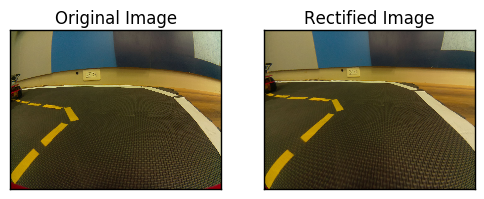

In [16]:
from matplotlib import pyplot as plt
#Use your own image
origin = cv2.imread("images/lane.jpg")
origin = cv2.resize(origin, (640, 480),interpolation=cv2.INTER_NEAREST)

'''
#rectfy the image by opencv 'undistort'
rec_img = ???
'''
h,w = origin.shape[:2]
newmatrix,roi = cv2.getOptimalNewCameraMatrix(matrix,coeffs,(w,h),0)
rec_img = cv2.undistort(origin,matrix,coeffs,None,newmatrix)

origin = cv2.cvtColor(origin,cv2.COLOR_BGR2RGB)
plt.subplot(121),plt.imshow(origin,cmap = 'brg')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

rec_img = cv2.cvtColor(rec_img,cv2.COLOR_BGR2RGB)
plt.subplot(122),plt.imshow(rec_img,cmap = 'brg')
plt.title('Rectified Image'), plt.xticks([]), plt.yticks([])

plt.show()

# Duckietown Lane Filter

up/down arrow keys to move, enter to edit

Esc to exit edit mode

Shift + enter to run code

1/2/3... to add comment

dd to delete cell

press h for more shortcuts

In [17]:
import numpy as np
from scipy.stats import multivariate_normal, entropy
from scipy.ndimage.filters import gaussian_filter
from math import floor, atan2, pi, cos, sin, sqrt
import time
from matplotlib import pyplot as plt

## Environment Setup

In [18]:
# constant
WHITE = 0
YELLOW = 1
RED = 2

lanewidth = 0.4
linewidth_white = 0.04
linewidth_yellow = 0.02



## Generate Vote (Extra Credit 10% for generating multiple votes from all detected segments)

#### Setup a line segment
* left edge of white lane
* right edge of white lane
* left edge of yellow lane
* right edge of white lane

In [19]:

# right edge of white lane
#p1 = np.array([0.8, 0.24])
#p2 = np.array([0.4, 0.24])
p1 = np.array([lines_normalized[0][0],lines_normalized[0][1]])
p2 = np.array([lines_normalized[0][2],lines_normalized[0][3]]) 
seg_color = YELLOW

# left edge of white lane
#p1 = np.array([0.4, 0.2])
#p2 = np.array([0.8, 0.2])
#seg_color = WHITE

#plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'ro')
#plt.plot([p1[0], p2[0]], [p1[1], p2[1]])
#plt.ylabel('y')
#plt.axis([0, 5, 0, 5])
#plt.show()

#### compute d_i, phi_i, l_i

In [20]:


t_hat = (p2-p1)/np.linalg.norm(p2-p1)
n_hat = np.array([-t_hat[1],t_hat[0]])
d1 = np.inner(n_hat,p1)
d2 = np.inner(n_hat,p2)
l1 = np.inner(t_hat,p1)
l2 = np.inner(t_hat,p2)

print (d1, d2, l1, l2)

if (l1 < 0):
    l1 = -l1;
if (l2 < 0):
    l2 = -l2;
l_i = (l1+l2)/2
d_i = (d1+d2)/2
phi_i = np.arcsin(t_hat[1])
if seg_color == WHITE: # right lane is white
    if(p1[0] > p2[0]): # right edge of white lane
        d_i = d_i - linewidth_white
        print ('right edge of white lane')
    else: # left edge of white lane
        d_i = - d_i
        phi_i = -phi_i
        print ('left edge of white lane')
    d_i = d_i - lanewidth/2

elif seg_color == YELLOW: # left lane is yellow
    if (p2[0] > p1[0]): # left edge of yellow lane
        d_i = d_i - linewidth_yellow
        phi_i = -phi_i
        print ('right edge of yellow lane')
    else: # right edge of white lane
        d_i = -d_i
        print ('right edge of yellow lane')
    d_i =  lanewidth/2 - d_i

    
print (d_i, phi_i, l_i) 

(0.69166666666666665, 0.69166666666666665, 0.28750000000000003, 0.38750000000000001)
right edge of yellow lane
(-0.47166666666666662, -0.0, 0.33750000000000002)


### Measurement Likelihood

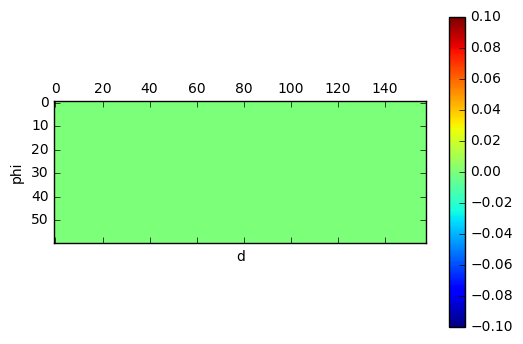

In [21]:
# initialize measurement likelihood

d_min = -0.7
d_max = 0.5
delta_d = 0.02
phi_min = -pi/2
phi_max = pi/2
delta_phi = 0.02
d, phi = np.mgrid[d_min:d_max:delta_d, phi_min:phi_max:delta_phi]

measurement_likelihood = np.zeros(d.shape)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(measurement_likelihood, interpolation='nearest')
fig.colorbar(cax)
plt.ylabel('phi')
plt.xlabel('d')
#ax.set_xticklabels(['']+alpha)
#ax.set_yticklabels(['']+alpha)
plt.show()



/home/robotvision/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


(16.0, 131.0)


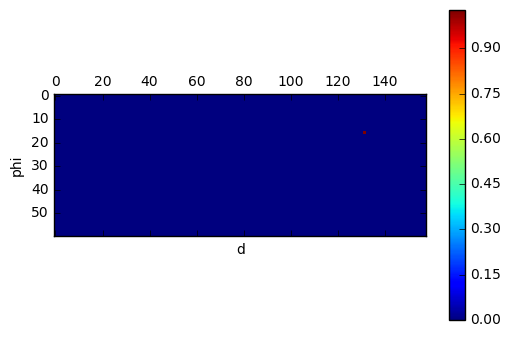

In [15]:
i = floor((d_i - d_min)/delta_d)
j = floor((phi_i - phi_min)/delta_phi)
measurement_likelihood[i,j] = measurement_likelihood[i,j] +  1/(l_i)

print (i, j)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(measurement_likelihood, interpolation='nearest')
fig.colorbar(cax)
plt.ylabel('phi')
plt.xlabel('d')
#ax.set_xticklabels(['']+alpha)
#ax.set_yticklabels(['']+alpha)
plt.show()

## Bayes' Filter (Extra Credit 10% for integrating Bayes' filter for multiple votes)